### Data Science Class with Onoja Anthony, PhD (Email: donmaston09@gmail.com)
#### Follow our Page on FaceBook: DataEdge Academy
#### Subscribe to our YouTube channel: @tonyonoja7880
##### Note: to run this script, you have to install the relevant Python packages and the datasets.
### Introduction

Machine learning models are increasingly used in various fields, from healthcare and finance to everyday applications. While these models can achieve high accuracy, their decision-making processes often remain opaque, especially in complex "black-box" models like deep neural networks. This lack of transparency can hinder trust, limit debugging, and impede the ability to identify and rectify potential biases or unfairness. Model interpretability, the focus of this hands-on session, seeks to address this issue by providing techniques and methods to understand and explain the decisions made by machine learning models.   

This session will introduce you to the concepts and practical applications of model interpretability. We will explore both model-agnostic and model-specific techniques, focusing on understanding individual predictions and overall model behavior. By the end of this session, you will gain hands-on experience in applying these techniques to real-world datasets, empowering you to build more transparent, trustworthy, and actionable machine learning solutions.

### Aims

The aims of this hands-on session are to:

- Provide practical experience with various model interpretability techniques.

- Enable students to apply interpretability methods to understand and explain machine learning model predictions.

- Foster critical thinking about the importance of interpretability in real-world applications.

#### Objectives

By the end of this hands-on session, students will be able to:

- Differentiate between model-agnostic and model-specific interpretability methods.   

- Implement and apply local interpretability techniques to explain individual predictions, such as LIME and SHAP.   

- Implement and apply global interpretability techniques to understand overall model behavior, such as Partial Dependence Plots and Feature Importance.   

- Evaluate and compare the strengths and limitations of different interpretability methods.

- Interpret and communicate the results of interpretability analyses effectively.

In [10]:
# Load the relevant packages, remember to use pip install if the package is missing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from lime.lime_tabular import LimeTabularExplainer

In [12]:
# Load dataset
data = load_breast_cancer()
X_bc = pd.DataFrame(data.data, columns=data.feature_names)
y_bc = data.target

Source: The dataset is obtained from the sklearn.datasets module, specifically using the load_breast_cancer() function. This is a well-known dataset often used for classification tasks.

Data: The dataset contains measurements from digitized images of breast mass. These measurements describe characteristics of the cell nuclei present in the image.

Features: The dataset has 30 features, which are various measurements computed from the digitized images. These features include:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
-perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)   
For each of these features, the mean, standard error, and "worst" or largest value (mean of top 3 largest values) were computed, resulting in the 30 features.

Target Variable: The dataset has one target variable, which is binary:

- 0 (Malignant): Indicates the breast mass is cancerous.
- 1 (Benign): Indicates the breast mass is not cancerous.

In [13]:
# EDA
print("\nBasic Statistics:")
X_bc.describe()


Basic Statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
X_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

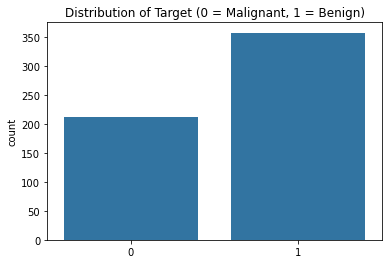

In [15]:
sns.countplot(x=y_bc)
plt.title('Distribution of Target (0 = Malignant, 1 = Benign)')
plt.show()

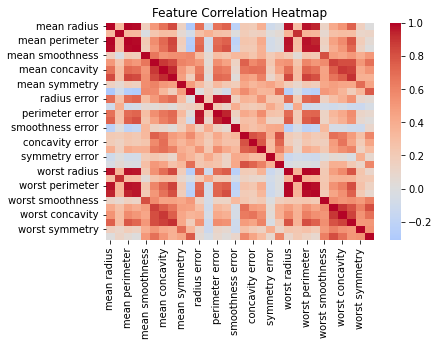

In [16]:
sns.heatmap(X_bc.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
# Split the data
# Split
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)


In [18]:
# Train fresh model
model_bc_rf = RandomForestClassifier(max_depth=5, random_state=42)
model_bc_rf.fit(X_bc_train, y_bc_train)

RandomForestClassifier(max_depth=5, random_state=42)

X_bc_test shape: (114, 30)
shap_values_bc.values.shape: (114, 30, 2)


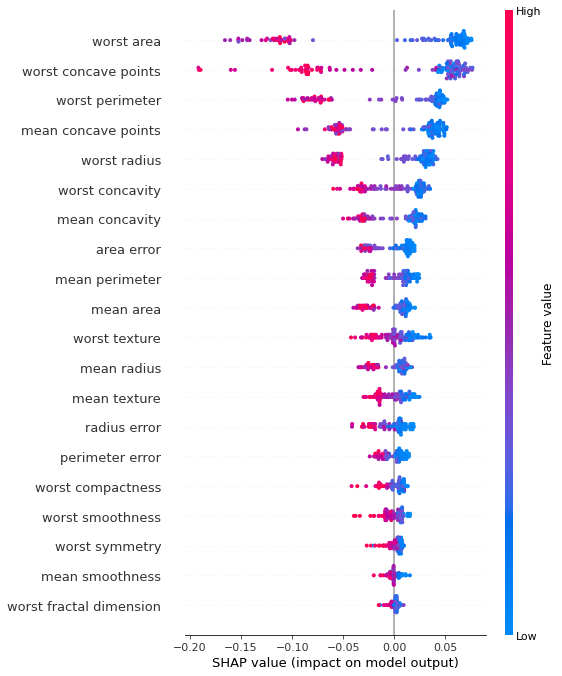

In [19]:
# Create NEW SHAP explainer
explainer_bc = shap.Explainer(model_bc_rf, X_bc_train)

# Compute SHAP values
shap_values_bc = explainer_bc(X_bc_test)

# Check shapes
print("X_bc_test shape:", X_bc_test.shape)         # (114, 30)
print("shap_values_bc.values.shape:", shap_values_bc.values.shape)  # (114, 30, 2)

# For binary classification, pick SHAP for class 1 (positive class)
shap_values_class_1 = shap_values_bc.values[:, :, 1]  # shape (114, 30)

# Plot SHAP summary for positive class
shap.summary_plot(shap_values_class_1, X_bc_test)


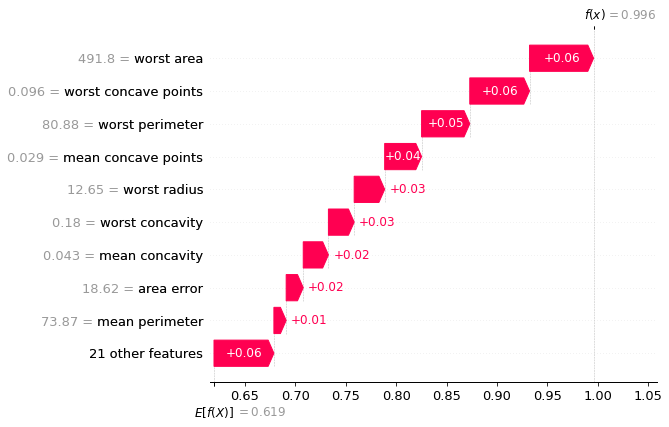

In [23]:
# Pick sample
sample_idx = 111

# Waterfall plot for the first test sample
shap.plots.waterfall(shap_values_bc[sample_idx, :, 1])